<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/DuplicateQuestionPairsNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

In [14]:
df=pd.read_csv('/content/questions.csv')

In [15]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [16]:
df.shape

(404351, 6)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [19]:
# missing values
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [21]:
df.duplicated().sum()

0

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

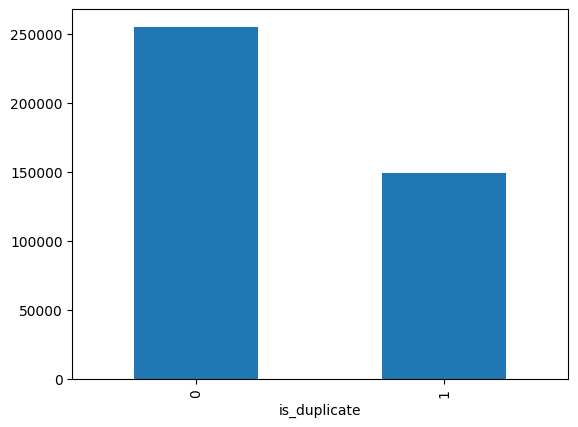

In [25]:
# Distribution
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [27]:
# Repeated Questions
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions repeated 13698


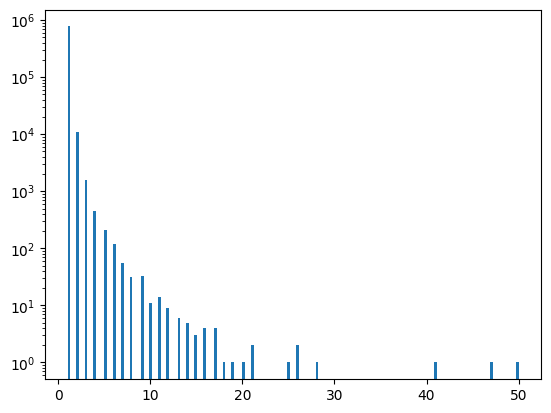

In [28]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [29]:
new_df=df.sample(30000)
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [30]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [33]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
34886,What is the funniest movie to watch?,What's the funniest movie you have ever seen?
230918,If I sent a message on Facebook Messenger and ...,If a message is sent but not delivered will th...
270270,What are some of the most popular / favourite ...,Which is the best quote or one-liner ever in a...
368428,What are the good online tutorials and books t...,What are some good books to learn DBMS?
373327,How can I cancel my Amazon Prime membership?,How do you cancel your Amazon Prime membership?


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [35]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [36]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [37]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
34886,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
230918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373327,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7483333333333333

In [40]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
y_pred=xgb.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7318333333333333

In [41]:
new_df=df.sample(30000,random_state=2)

In [42]:
# Repeated Questions
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions repeated',x[x].shape[0])

Number of unique questions 59795
Number of questions repeated 176


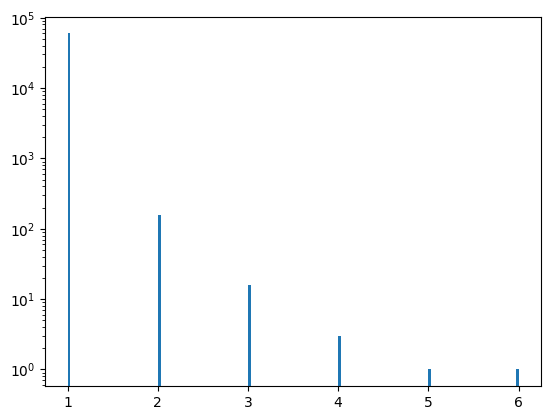

In [43]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [45]:
#Feature Engineering
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [46]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39


In [47]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


In [48]:
def common_words(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return len(w1&w2)

In [49]:
new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3


In [50]:
def total_words(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return (len(w1)+len(w2))


In [51]:
new_df['word_total']=new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19


In [52]:
new_df['word_share']=round(new_df['word_common']/new_df['word_common'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19,1.0
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32,1.0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,1.0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18,1.0
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19,1.0


minimum characters 2
maximum characters 332
average num of characters 59


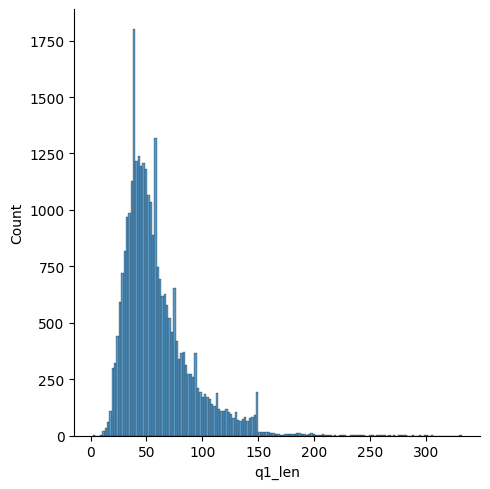

In [53]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 3
maximum characters 1151
average num of characters 59


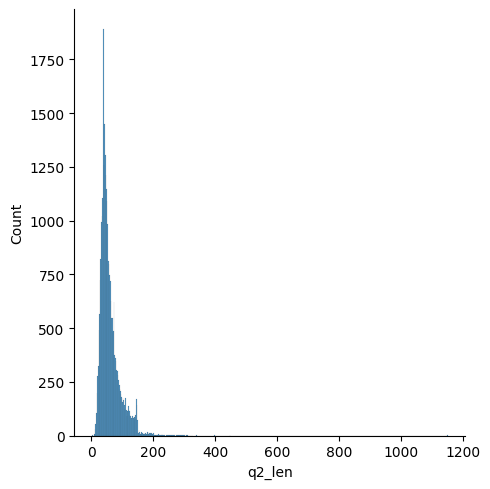

In [54]:
# Analysis of features
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum characters 1
maximum characters 63
average num of characters 10


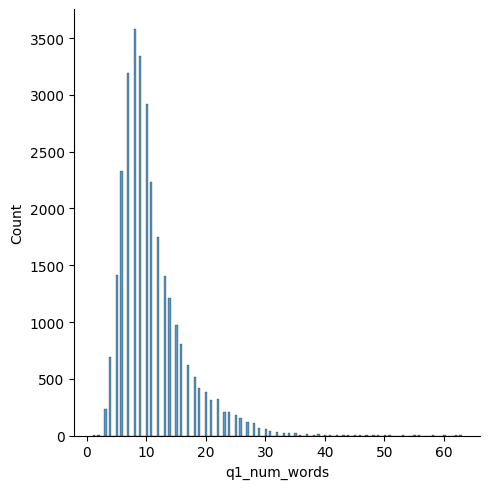

In [55]:
# Analysis of features
sns.displot(new_df['q1_num_words'])
print('minimum characters',new_df['q1_num_words'].min())
print('maximum characters',new_df['q1_num_words'].max())
print('average num of characters',int(new_df['q1_num_words'].mean()))

minimum characters 1
maximum characters 237
average num of characters 11


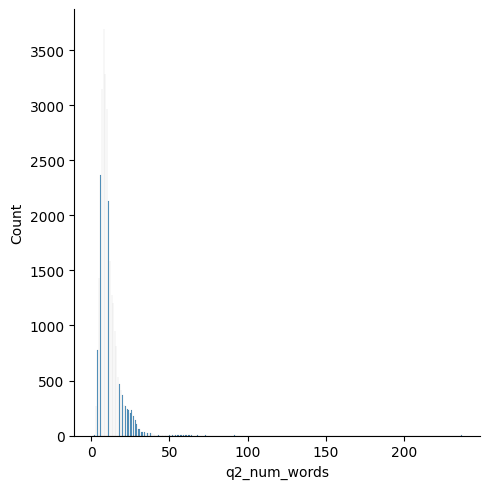

In [56]:
# Analysis of features
sns.displot(new_df['q2_num_words'])
print('minimum characters',new_df['q2_num_words'].min())
print('maximum characters',new_df['q2_num_words'].max())
print('average num of characters',int(new_df['q2_num_words'].mean()))

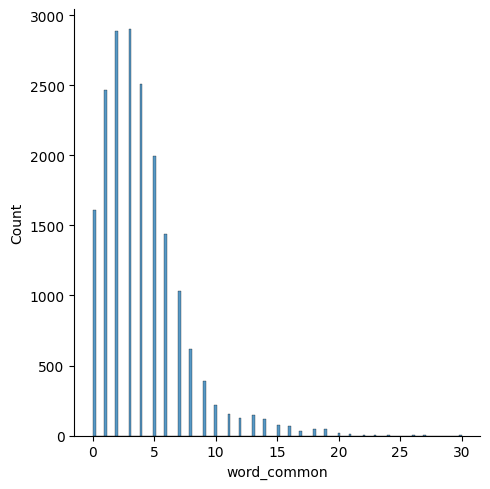

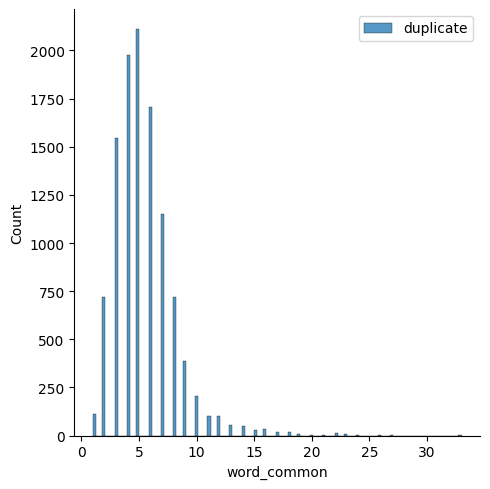

In [57]:
#common words
sns.displot(new_df[new_df['is_duplicate']==0]['word_common'],label='non_duplicate')
sns.displot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

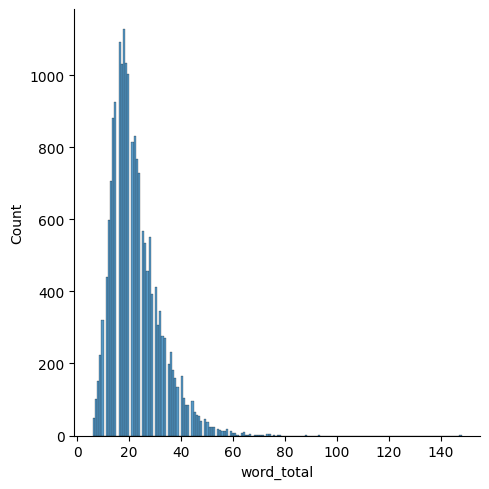

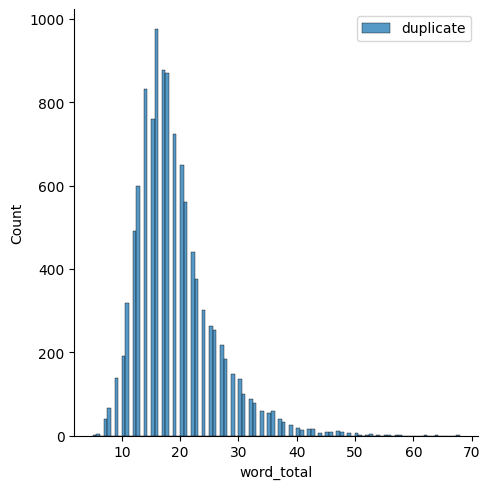

In [58]:
#common words
sns.displot(new_df[new_df['is_duplicate']==0]['word_total'],label='non_duplicate')
sns.displot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

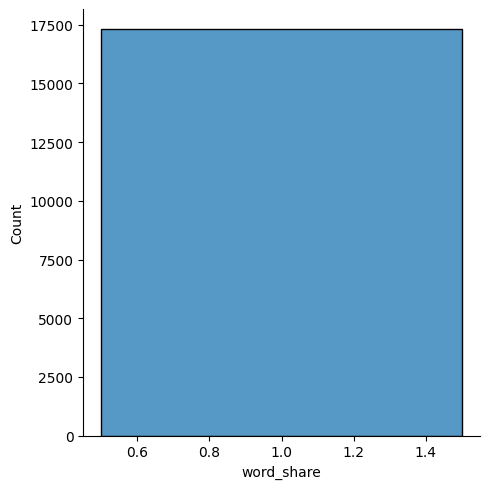

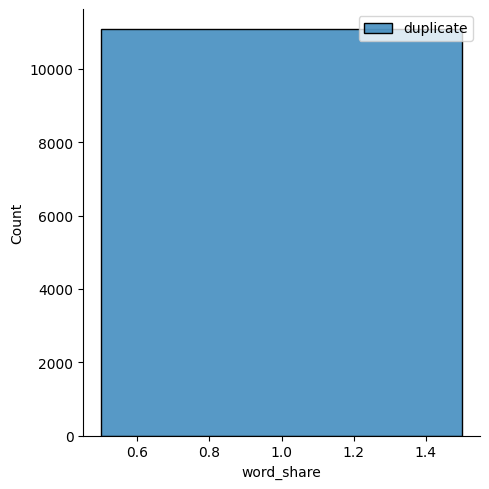

In [59]:
#common words
sns.displot(new_df[new_df['is_duplicate']==0]['word_share'],label='non_duplicate')
sns.displot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [60]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [61]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)

(30000, 8)


In [62]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,1,58,42,11,8,4,19,1.0
289521,0,52,105,11,22,2,32,1.0
4665,0,125,124,24,24,20,42,1.0
54203,1,45,60,8,10,5,18,1.0
132566,0,54,39,11,8,3,19,1.0


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

#merge text
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [64]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [65]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [69]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7533333333333333

In [72]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
Y_pred=xgb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7558333333333334


1) cwc-min = #common words/min(words(q1,q2))

2) cwc-max = #common words/max(words(q1,q2))

3)csc-min = #common stopwords/min(stopwords(q1,q2))

4) csc-max = #common stopwords/max(stopwords(q1,q2))

5) ctc-min = #common tokens/min(tokens(q1,q2))


6) ctc-max = #common tokens/max(tokens(q1,q2))

7) last_word_eq

8) first_word_eq

# Length based features
1) mean_len
2) abs_len_diff
3) longest_substr_ratio

# Fuzzy features
1) Fuzz_ratio
2) fuzz_partial_ratio
3) token_sort_ratio
4) token_set_ratio


The simplest way to compare two strings is with a measurement of edit distance. For example, the following two strings are quite similar.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv('/content/questions.csv')

In [75]:
new_df=df.sample(30000,random_state=2)

In [76]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0
